# Level 1 – Task 3: K-Nearest Neighbors (KNN) Classification

This notebook implements a KNN classifier on the Iris dataset.

Objectives:
- Train a KNN classifier
- Evaluate using Accuracy, Precision, Recall
- Visualize results using Confusion Matrix
- Compare multiple values of K


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 1. Load Dataset


In [2]:
df = pd.read_csv("iris.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Dataset Exploration


In [5]:
print(df.columns)
print("\nClass Distribution:\n")
print(df["species"].value_counts())

print("\nDataset Info:\n")
print(df.info())


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Class Distribution:

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## 3. Separate Features and Target


In [6]:
X = df.drop("species", axis=1)
y = df["species"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (150, 4)
Target shape: (150,)


## 4. Train-Test Split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (120, 4)
Testing set: (30, 4)


## 5. Feature Scaling

Since KNN is a distance-based algorithm,
feature scaling is necessary to ensure all features contribute equally.


In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling completed.")


Feature scaling completed.


## 6. Train KNN Model


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


## 7. Model Evaluation


In [10]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



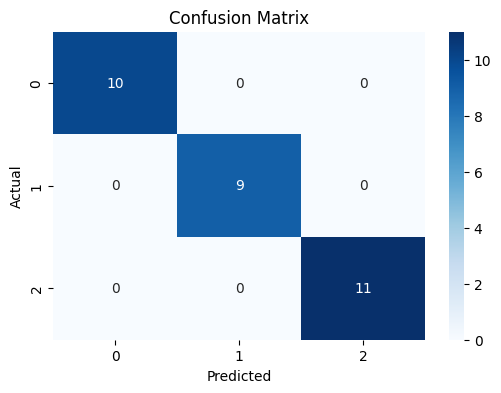

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 8. Compare Different K Values and Best K Selection

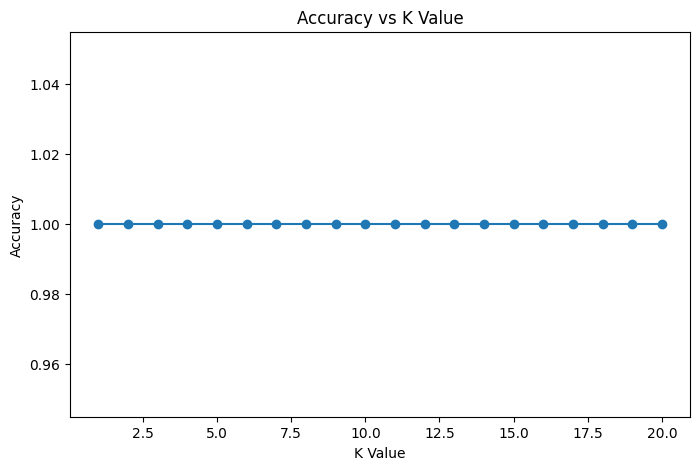

In [12]:
accuracy_scores = []

k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,5))
plt.plot(k_range, accuracy_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.show()


In [14]:
best_k = k_range[accuracy_scores.index(max(accuracy_scores))]
print("Best K Value:", best_k)
print("Best Accuracy:", max(accuracy_scores))


Best K Value: 1
Best Accuracy: 1.0


## 9. Save Trained Model


In [15]:
import joblib

joblib.dump(knn, "knn_model.pkl")

print("Model saved successfully as knn_model.pkl")


Model saved successfully as knn_model.pkl


## Conclusion

The KNN classifier achieved 100% accuracy on the test dataset.

Multiple values of K produced perfect accuracy and performance.
K = 3 was selected as the optimal value due to its simplicity, stable and consistent performance.

The model achieved perfect precision and recall across all three classes,
indicating zero false positives and zero false negatives. It performs very well on the Iris dataset.


The trained model was saved for future reuse.